In [1]:
# requests for fetching html of website
import requests

# Make the GET request to a url
r = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')

# Extract the content
c = r.content

# Import BeautifulSoup
from bs4 import BeautifulSoup

# Create a soup object
soup = BeautifulSoup(c)

In [2]:
# Print results
soup

<!DOCTYPE html>
<html lang="en"><head><link href="/pf/dist/components/output-types/default.css?d=1028" id="fusion-output-type-styles" rel="stylesheet" type="text/css"/><link href="/pf/dist/components/combinations/default.css?d=1028" id="fusion-template-styles" rel="stylesheet" type="text/css"/><link href="/pf/resources/dist/cleveland/css/style.css?d=1028" rel="stylesheet"/><meta content="true" name="isArticleBeta"/><script id="polyfill-script" type="application/javascript">if(!Array.prototype.includes||!(window.Object && window.Object.assign)||!window.Promise||!window.Symbol||!window.fetch){document.write('<script type="application/javascript" src="/pf/dist/engine/polyfill.js?d=1028" defer=""><\/script>')}</script><script defer="" id="fusion-engine-react-script" src="/pf/dist/engine/react.js?d=1028" type="application/javascript"></script><script defer="" id="fusion-engine-combinations-script" src="/pf/dist/components/combinations/default.js?d=1028" type="application/javascript"></scrip

In [3]:
# Find the element on the webpage
main_content = soup.find('div', attrs = {'class': 'entry-content'})

In [4]:
# Print results
main_content

<div class="entry-content"><p class="article__paragraph article__paragraph--left" id="UDT3SSNMTRCTFDQE6DBFNJODLI">CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p><div id="inarticle-1"></div><p class="article__paragraph article__paragraph--left" id="AOJSWF2SO5F6NLAFYE77J7FAPI">Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p><div class="InContent_Center_Background"><div class="InContent_Center_Padding"><div class="ad-observer" id="InContent_Center_AOJSWF2SO5F6NLAFYE77J7FAPI"></div></div></div><div id="inarticle-2"></div><p class="article__paragraph article__paragraph-

In [5]:
# Extract the relevant information as text
content = main_content.find('ul').text

In [6]:
# Print results
content

'Grant Cornwell, College of Wooster (left in 2015): $911,651Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913Mark Roosevelt, Antioch College, (left in 2015): $507,672Laurie Joyner, Wittenberg University (left in 2015): $463,504Richard Giese, University of Mount Union (left in 2015): $453,800Sean Decatur,Kenyon College: $451,698Adam Weinberg, Denison University: $435,322Daniel Dibiasio, Ohio Northern University: $414,716Denvy Bowman, Capital University (left in 2016): $388,570Anne Steele, Muskingum University (left in 2016): $384,233Kathy Krendl, Otterbein University: \xa0$378,035Rockwell Jones, Ohio Wesleyan University: $366,625Robert Helmer, Baldwin Wallace University: $365,616Robert Huntington, Heidelberg University: $300,005Lori Varlotta, Hiram College: $293,336Joseph Bruno, Marietta College (left in 2016): $288,295W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761'

In [7]:
# import regex library
import re

# Create a pattern to match names
name_pattern = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)

# Find all occurrences of the pattern
names = name_pattern.findall(content)

In [8]:
# Print results
names

['Grant Cornwell']

In [15]:
# Make school patttern and extract schools
school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
schools = school_pattern.findall(content)

# Pattern to match the salaries
salary_pattern = re.compile(r'\$.+')
salaries = salary_pattern.findall(content)

In [16]:
# Print the salaries
salaries

['$911,651Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913Mark Roosevelt, Antioch College, (left in 2015): $507,672Laurie Joyner, Wittenberg University (left in 2015): $463,504Richard Giese, University of Mount Union (left in 2015): $453,800Sean Decatur,Kenyon College: $451,698Adam Weinberg, Denison University: $435,322Daniel Dibiasio, Ohio Northern University: $414,716Denvy Bowman, Capital University (left in 2016): $388,570Anne Steele, Muskingum University (left in 2016): $384,233Kathy Krendl, Otterbein University: \xa0$378,035Rockwell Jones, Ohio Wesleyan University: $366,625Robert Helmer, Baldwin Wallace University: $365,616Robert Huntington, Heidelberg University: $300,005Lori Varlotta, Hiram College: $293,336Joseph Bruno, Marietta College (left in 2016): $288,295W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761']

In [11]:
# # Messy salaries
# salaries = ['$876,001', '$543,903', '$2453,896']

# # Convert salaries to numbers in a list comprehension
# [int(''.join(s[1:].split(','))) for s in salaries]

[876001, 543903, 2453896]

Les exemples de code ci-dessus ne récupère pas toutes les informations que l'ont recherche. On va donc adapter ces exemples de code.

In [17]:
# turning salaries variable into a string
text = str(salaries)

# define regular expression patterns to extract names, salaries, and colleges
name_pattern = r'(?P<name>[A-Za-z.\s]+),'
salary_pattern = r'\$(?P<salary>\d+(,\d{3})*(\.\d+)?)'
college_pattern = r'(?P<college>[A-Za-z\s&]+)( \(left in \d{4}\))?:'

# compile regular expression patterns into regex objects
name_regex = re.compile(name_pattern)
salary_regex = re.compile(salary_pattern)
college_regex = re.compile(college_pattern)

# find all matches for each regex pattern in the text
names = name_regex.findall(text)
salaries = salary_regex.findall(text)
colleges = college_regex.findall(text)

In [18]:
# print list of names
names

['Marvin Krislov',
 'Mark Roosevelt',
 ' Antioch College',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [19]:
# print list of salaries
salaries

[('911,651', ',651', ''),
 ('829,913', ',913', ''),
 ('507,672', ',672', ''),
 ('463,504', ',504', ''),
 ('453,800', ',800', ''),
 ('451,698', ',698', ''),
 ('435,322', ',322', ''),
 ('414,716', ',716', ''),
 ('388,570', ',570', ''),
 ('384,233', ',233', ''),
 ('378,035', ',035', ''),
 ('366,625', ',625', ''),
 ('365,616', ',616', ''),
 ('300,005', ',005', ''),
 ('293,336', ',336', ''),
 ('288,295', ',295', ''),
 ('221,761', ',761', '')]

La variable 'salaries' est une liste de tuples qui contient des éléments superflu, on va donc la netoyée.

In [23]:
cleaned_salaries = []
for salary in salaries:
    salary = salary[0]
    cleaned_salaries.append(float(re.sub(",", "", salary))) # remove commas from the salary string and convert string to numeric
    
print(cleaned_salaries)

[911651.0, 829913.0, 507672.0, 463504.0, 453800.0, 451698.0, 435322.0, 414716.0, 388570.0, 384233.0, 378035.0, 366625.0, 365616.0, 300005.0, 293336.0, 288295.0, 221761.0]


In [24]:
# print list of colleges
colleges

[(' Oberlin College', ' (left in 2016)'),
 (' Wittenberg University', ' (left in 2015)'),
 (' University of Mount Union', ' (left in 2015)'),
 ('Kenyon College', ''),
 (' Denison University', ''),
 (' Ohio Northern University', ''),
 (' Capital University', ' (left in 2016)'),
 (' Muskingum University', ' (left in 2016)'),
 (' Otterbein University', ''),
 (' Ohio Wesleyan University', ''),
 (' Baldwin Wallace University', ''),
 (' Heidelberg University', ''),
 (' Hiram College', ''),
 (' Marietta College', ' (left in 2016)')]

La variable 'colleges' est une liste de tuples qui contient des éléments superflu, on va donc la netoyée.

In [25]:
cleaned_colleges = []
for college in colleges:
    college = college[0]
    cleaned_colleges.append(college)
    
print(cleaned_colleges)

[' Oberlin College', ' Wittenberg University', ' University of Mount Union', 'Kenyon College', ' Denison University', ' Ohio Northern University', ' Capital University', ' Muskingum University', ' Otterbein University', ' Ohio Wesleyan University', ' Baldwin Wallace University', ' Heidelberg University', ' Hiram College', ' Marietta College']


# DataViz

In [26]:
# Import libraries for DataViz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# making sure that all list are the same length by adding NaN values if necessary
# findind the length of the longest list
max_length = max(len(names), len(cleaned_colleges), len(cleaned_salaries))

# pad the shorter lists with NaN values
names += [None] * (max_length - len(names))
cleaned_colleges += [None] * (max_length - len(cleaned_colleges))
cleaned_salaries += [None] * (max_length - len(cleaned_salaries))

# dataframe creation
df = pd.DataFrame({"College":cleaned_colleges, "President":names, "Salary":cleaned_salaries})
df.head(5)

,College,President,Salary
0,Oberlin College,Marvin Krislov,911651.0
1,Wittenberg University,Mark Roosevelt,829913.0
2,University of Mount Union,Antioch College,507672.0
3,Kenyon College,Laurie Joyner,463504.0
4,Denison University,Richard Giese,453800.0


<Axes: ylabel='President'>

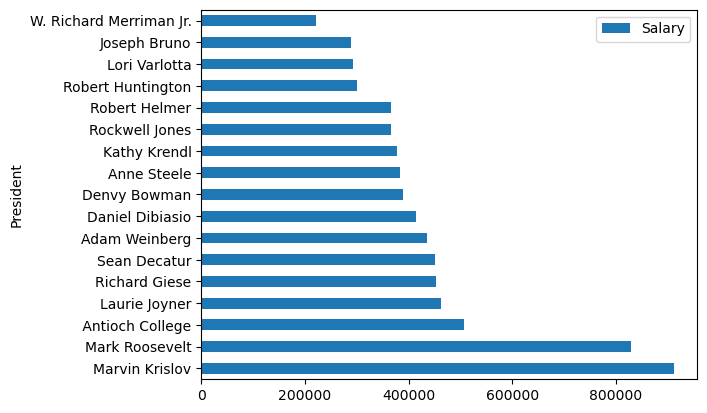

In [37]:
# Make a horizontal bar chart
df.plot(kind='barh', x = 'President', y = 'Salary')

<Axes: xlabel='Salary', ylabel='President'>

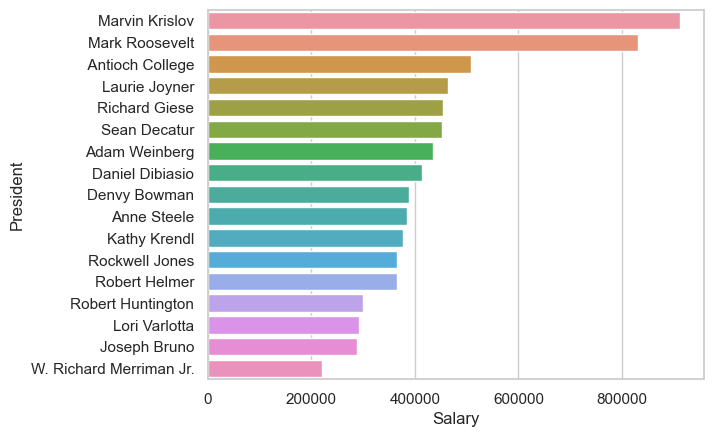

In [43]:
# create horizontal bar chart using seaborn
sns.set(style="whitegrid")
sns.barplot(x='Salary', y='President', data=df)